# Baseline Model 성능 비교

Easy_ocr, paddle_ocr, tesseract_ocr 모델 비교 후 성능 비교

- 대표적인 5개 이미지에 대한 성능 비교
    - 다양한 글꼴, 크기, 이미지 품질 변화, 왜곡, 회전, 배경 복잡도에 따른 이미지 선정
- 성능 비교 기준
    - 글자 단위로 정확도 측정 ex) 책 → 책(O), 핵(X)
    - 단어 단위로 정확도 측정
    - 문장 단위로 정확도 측정


In [1]:
import easyocr
from paddleocr import PaddleOCR
import pytesseract

from PIL import Image 

## Easy_OCR

In [ ]:
easy_ocr = easyocr.Reader(['ko', 'en']) #esayocr 객체
paddle_ocr = PaddleOCR(use_angle_cls=True, lang='korean') #paddleorc 객체


[2025/03/06 15:25:03] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/Users/rohhail/.paddleocr/whl/det/ml/Multilingual_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/Users/rohhail/.paddleocr/whl/rec/korean/korean_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_ba

In [18]:
image_path = '../data/book_cover_sample/images/'
book_cover_images = ['책표지_총류_000002.jpg','책표지_총류_000085.jpg','책표지_총류_000102.jpg','책표지_총류_000292.jpg','책표지_총류_000586.jpg']
# 5 images for testing

In [19]:

for i in range(len(book_cover_images)):
    path = image_path + book_cover_images[i]
    easy_results = easy_ocr.readtext(path)  # esayocr 글자 인식
    easy_recognized_texts = [text for bbox, text, prob in easy_results] #esayocr 인식된 글자 출력

    print(f"EASYOCR {i}:")
    print("----------------------------------------")
    print(easy_recognized_texts)


EASYOCR 0:
----------------------------------------
['실내립오', '유정식 지음']
EASYOCR 1:
----------------------------------------
['난독 시대들 타파할', '독시의 기술', '혼자 위기부터', '붐클럽 참여까지', '실은 독서 따뉴업']
EASYOCR 2:
----------------------------------------
['로근', '유산을', '찾아서', '근통의']
EASYOCR 3:
----------------------------------------
['요:\' t" 5i"', '2', 'Delitti', 'Del Mosaico', '단테일', '그짓이크 살인', "고' TI", '줄리오 레오니 장편소설 | 이현경 옮김', 'jairs', '스38']
EASYOCR 4:
----------------------------------------
['토', '록', '어', '여', '팀', '책', '이상회 최험미 한미화 김VO US']


## Tesseract_OCR

In [21]:
tessdata_dir = '/opt/homebrew/share/tessdata'  # 한국어 데이터 위치
config = f'--tessdata-dir "{tessdata_dir}"' 

In [22]:

for i in range(len(book_cover_images)):
    path = image_path + book_cover_images[i]
    img = Image.open(path)
    tesseract_results = pytesseract.image_to_string(img, lang='eng+kor', config=config)  
    tesseract_recognized_texts = tesseract_results

    print(f"Tesseract_OCR {i}:")
    print("----------------------------------------")
    print(tesseract_recognized_texts)


Tesseract_OCR 0:
----------------------------------------

Tesseract_OCR 1:
----------------------------------------
난 독 시 대 를 타 파 할

도 서 이 기 솔

혼 자 읽 기 부 터

밝 궤 AlAs} Sui ao
\ we ge 4) iN


Tesseract_OCR 2:
----------------------------------------

Tesseract_OCR 3:
----------------------------------------
! Delitti


Tesseract_OCR 4:
----------------------------------------



## Paddle_OCR

In [25]:
paddle_ocr = PaddleOCR(use_angle_cls=True, lang='en+korean') #객체 생성

AssertionError: param lang must in dict_keys(['ch', 'en', 'korean', 'japan', 'chinese_cht', 'ta', 'te', 'ka', 'latin', 'arabic', 'cyrillic', 'devanagari']), but got en+korean

In [27]:

for i in range(len(book_cover_images)):
    path = image_path + book_cover_images[i]
    img = Image.open(path)
    paddle_results = paddle_ocr.ocr(path, cls=True)
    paddle_recognized_texts = paddle_results

    print(f"Paddle_OCR {i}:")
    print("----------------------------------------")
    for line in paddle_recognized_texts:
        for word_info in line:
            text, confidence = word_info[1]
            print(f"[{text}],")



[2025/03/06 15:47:59] ppocr DEBUG: dt_boxes num : 4, elapsed : 0.23248887062072754
[2025/03/06 15:47:59] ppocr DEBUG: cls num  : 4, elapsed : 0.017142057418823242
[2025/03/06 15:47:59] ppocr DEBUG: rec_res num  : 4, elapsed : 0.709036111831665
Paddle_OCR 0:
----------------------------------------
[시나리오],
[애],
[유정식],
[지음],
[2025/03/06 15:48:00] ppocr DEBUG: dt_boxes num : 11, elapsed : 0.22488689422607422
[2025/03/06 15:48:00] ppocr DEBUG: cls num  : 11, elapsed : 0.05093216896057129
[2025/03/06 15:48:02] ppocr DEBUG: rec_res num  : 11, elapsed : 1.837109088897705
Paddle_OCR 1:
----------------------------------------
[르프크],
[난독],
[시대를],
[독서의기술],
[혼자],
[읽기부터],
[북클럽],
[참여까지],
[독서],
[뉴얼],
[실전],
[2025/03/06 15:48:02] ppocr DEBUG: dt_boxes num : 3, elapsed : 0.22202587127685547
[2025/03/06 15:48:02] ppocr DEBUG: cls num  : 3, elapsed : 0.013337135314941406
[2025/03/06 15:48:02] ppocr DEBUG: rec_res num  : 3, elapsed : 0.5240051746368408
Paddle_OCR 2:
---------------------------------------

 ## OCR 성능 평가 지표
 - 글자 단위 
    - 글자 존재를 인식 했는지 + 1
    - 글자를 제대로 알맞게 인식 했는지 + 1 

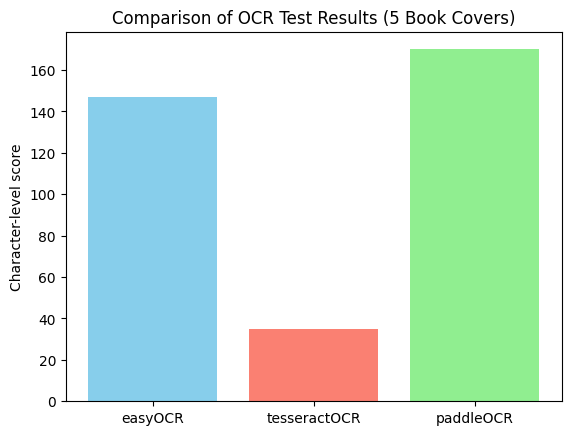

In [35]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

ocrs = ['easyOCR', 'tesseractOCR', 'paddleOCR']
values = [147, 35, 170]
colors = ['skyblue', 'salmon', 'lightgreen']  # 각 막대별 색상 리스트

ax.bar(ocrs, values, color=colors)

ax.set_ylabel('Character-level score')
ax.set_title('Comparison of OCR Test Results (5 Book Covers)')

plt.show()